<a href="https://colab.research.google.com/github/vidya100804/DEEP-LEARNING-EXPERIMENTS/blob/main/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install unrar -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dogs-vs-cats.rar


Would you like to replace the existing file /content/dogs-vs-cats/dogs-vs-cats/cats/240_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg
 24702 bytes, modified on 2024-12-03 06:24
with a new one
 24702 bytes, modified on 2024-12-03 06:24

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

In [4]:
!ls "/content/dogs-vs-cats/"

dogs-vs-cats


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
dataset_dir = "/content/dogs-vs-cats/"

In [7]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [9]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 4 images belonging to 1 classes.


In [10]:
val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 1 images belonging to 1 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), strides=(1,1), padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.8234 - val_accuracy: 1.0000 - val_loss: 2.5862e-05
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 2.1075e-09
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step - accuracy: 1.0000 - loss: 3.2250e-05 - val_accuracy: 1.0000 - val_loss: 6.1470e-13
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step - accuracy: 1.0000 - loss: 5.8787e-07 - val_accuracy: 1.0000 - val_loss: 6.2430e-17
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step - accuracy: 1.0000 - loss: 1.7738e-09 - val_accuracy: 1.0000 - val_loss: 1.2335e-20
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step - accuracy: 1.0000 - loss: 9.1505e-11 - val_accuracy: 1.0000 - val_loss: 3.1520e-24
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step - accuracy: 1.0000 - loss: 1.1390e-12 - val_accuracy: 1.0000 - val_loss: 4.3018e-27
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step - accuracy: 1.0000 

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Model Accuracy')

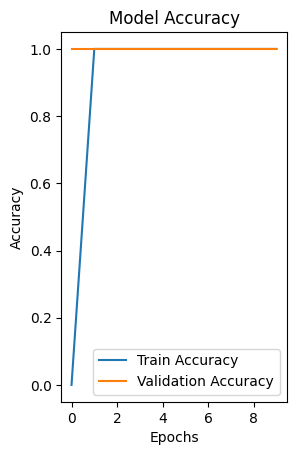

In [18]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

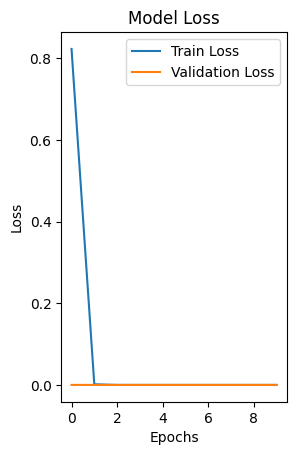

In [19]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [31]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    if prediction > 0.5:
        label = "Dog"
        confidence = prediction
        print(f"The image is a Dog ({prediction:.2f})")
    else:
        label = "Cat"
        confidence = 1 - prediction
        print(f"The image is a Cat ({1 - prediction:.2f})")\

        plt.imshow(image.load_img(img_path))
        plt.axis("off")
        plt.title(f"Prediction: {label} ({confidence:.2f})")
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The image is a Cat (1.00)


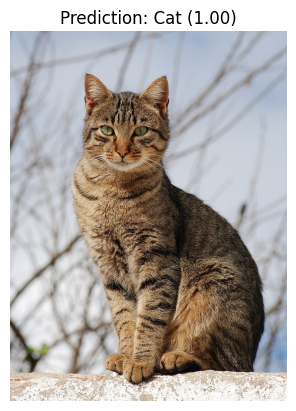

In [33]:
predict_image("/content/CAT_Img.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The image is a Cat (1.00)


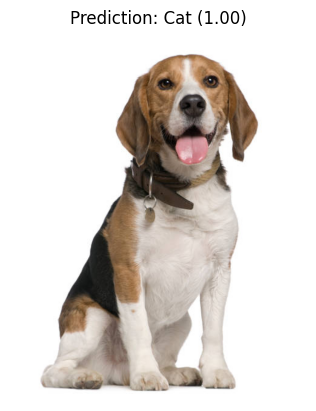

In [34]:
predict_image("/content/Dog2_IMG.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The image is a Cat (1.00)


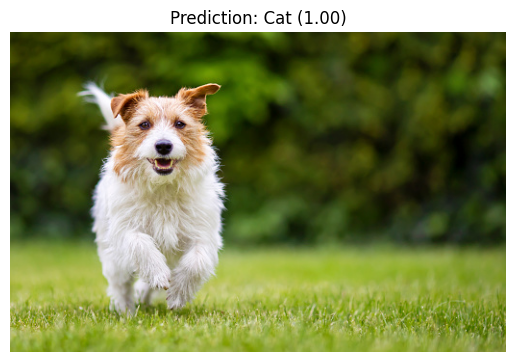

In [36]:
predict_image("/content/Dog3_IMG.jpg")

In [43]:
predict_image=("/content/dogs-vs-cats/dogs-vs-cats/dogs/German-Shepherd-dog-Alsatian.webp")

In [45]:
predict_image=("/content/dogs-vs-cats/dogs-vs-cats/dogs/istockphoto-1320018473-170667a.jpg")